### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the datasets

In [2]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
## Only keep the last two columns of the data for K-MEANS algorithm
X = data.iloc[:, 3:].values

### Using the elbow method to find the optimal numbers of clusters

In [9]:
from sklearn.cluster import KMeans 
WCSS = [] 
## within cluster sum of squares
for i in range (1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state = 42)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

Plotting the elbow method

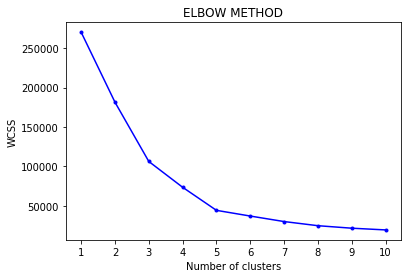

In [12]:
clusters = [i for i in range(1,11)]
plt.plot(clusters,WCSS,'b.-')
plt.title('ELBOW METHOD')
plt.xticks(clusters)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
###From the graph it can be depicted that 5 clusters are the optimal number of clusters

### Training the K-Means model on dataset

In [17]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_Kmeans = kmeans.fit_predict(X)
print(y_Kmeans)
### Dependent variables created with the help of k-means algorithm

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


### Visualising the Clusters

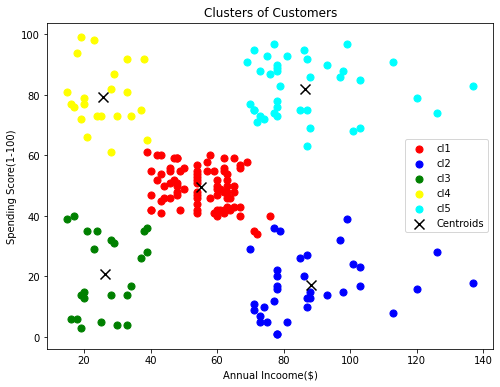

In [34]:
plt.figure(figsize=(8,6))
color = ['red','blue','green','yellow','cyan']
labels = ['cl1','cl2','cl3','cl4','cl5']
for i in range(5):
    plt.scatter(X[y_Kmeans == i,0],X[y_Kmeans == i,1],c = color[i],s=50,label=labels[i])
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s =100,marker='x',c='black',label='Centroids')
plt.title("Clusters of Customers")
plt.xlabel('Annual Incoome($)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()